# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [ ]:
%matplotlib inline

import random
import numpy as np

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [ ]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
ys = list(map(g, xs)) # targets

ts = list(map(f, xs)) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

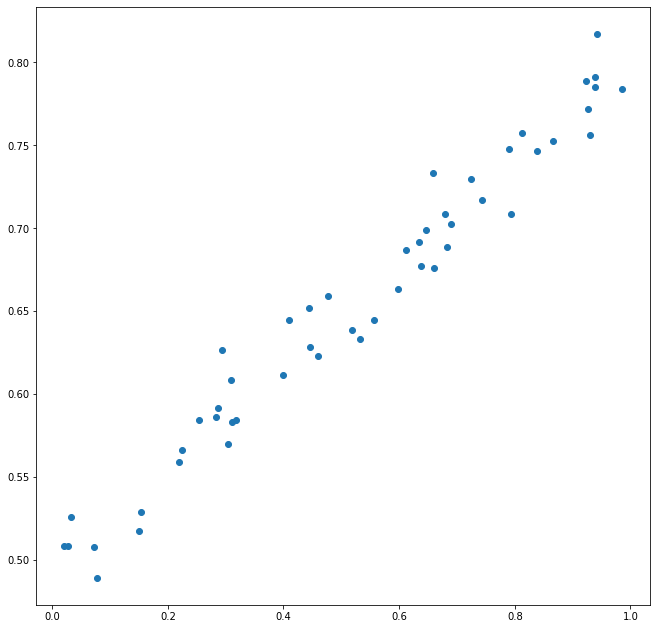

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [ ]:
def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    return np.mean((np.array(ys)-np.array(ps))**2)

Please take a while to (roughly) guess the output before executing the cell below.

In [ ]:
l2_loss(ys, ts)

0.00028491775503976095

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [ ]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

xs,ys,ts = np.array(xs), np.array(ys), np.array(ts)

for i in range(n_epochs):
    # dL/da = dL/dh * dh/da
    # dL/db = dL/dh * dh/db
    # dL/dh = d/dh (1/n sum(y-h)^2) = 1/n*sum 2*(h-y)
    # dh/da = x
    # dh/db = 1
    y_pred = predict(a,b,xs)
    dloss_a = (1/n) * np.dot(xs, 2*(y_pred-ys))
    dloss_b = (1/n) * np.sum(2*(y_pred-ys))

    a-=lr*dloss_a
    b-=lr*dloss_b

    loss = evaluate(a, b)
    losses.append(loss)
    print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b))

Iter:   0 Loss: 0.03791841 a:  0.36822, b:  0.65523
Iter:   1 Loss: 0.00354655 a:  0.26187, b:  0.46201
Iter:   2 Loss: 0.00058363 a:  0.29467, b:  0.51782
Iter:   3 Loss: 0.00032554 a:  0.28653, b:  0.50061
Iter:   4 Loss: 0.00030071 a:  0.29032, b:  0.50487
Iter:   5 Loss: 0.00029627 a:  0.29052, b:  0.50289
Iter:   6 Loss: 0.00029386 a:  0.29170, b:  0.50278
Iter:   7 Loss: 0.00029187 a:  0.29251, b:  0.50216
Iter:   8 Loss: 0.00029012 a:  0.29336, b:  0.50174
Iter:   9 Loss: 0.00028859 a:  0.29413, b:  0.50129
Iter:  10 Loss: 0.00028724 a:  0.29486, b:  0.50089
Iter:  11 Loss: 0.00028605 a:  0.29554, b:  0.50051
Iter:  12 Loss: 0.00028501 a:  0.29618, b:  0.50015
Iter:  13 Loss: 0.00028409 a:  0.29678, b:  0.49981
Iter:  14 Loss: 0.00028328 a:  0.29735, b:  0.49950
Iter:  15 Loss: 0.00028256 a:  0.29788, b:  0.49920
Iter:  16 Loss: 0.00028193 a:  0.29838, b:  0.49892
Iter:  17 Loss: 0.00028138 a:  0.29884, b:  0.49866
Iter:  18 Loss: 0.00028089 a:  0.29928, b:  0.49842
Iter:  19 Lo

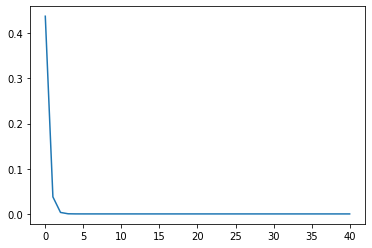

In [ ]:
plt.plot(losses)

Let's now visually asses how we do on training data

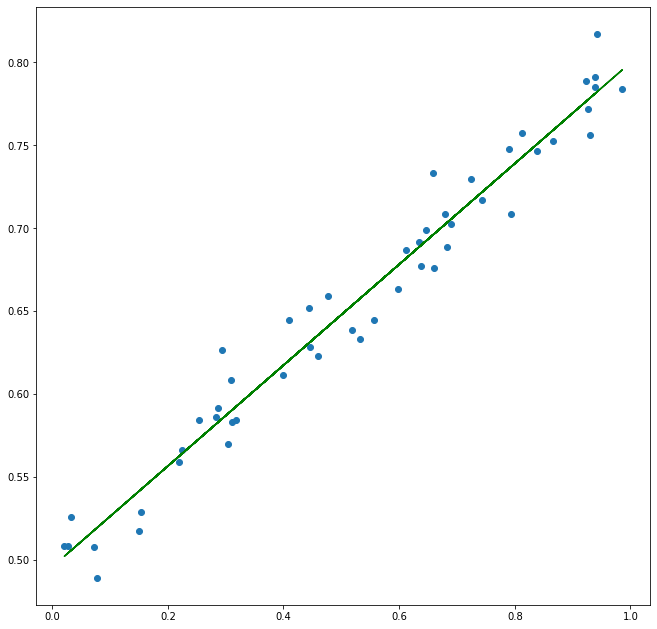

In [ ]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

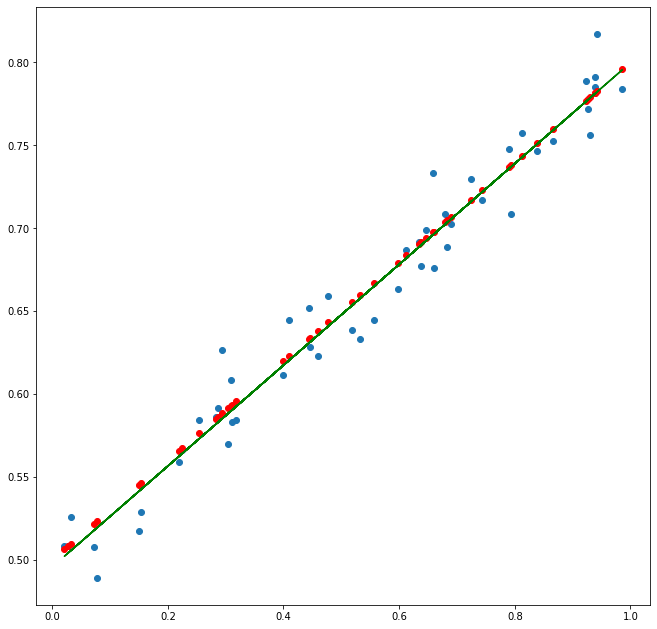

In [ ]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.scatter(xs, ts, c='red')

plt.plot(xs, predict(a, b), c='g')

plt.show()

Let's check our implementation vs. the one in sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(sk_loss, sk_a, sk_b))

Loss: 0.00027730 a:  0.30594, b:  0.49469
